<a href="https://colab.research.google.com/github/karthikmandelli/Cosmo/blob/main/temperature_prediciton_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("/content/december-april-30-9803.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9807 non-null   object 
 1   LWP     9807 non-null   int64  
 2   WS      9807 non-null   float64
 3   WD      9807 non-null   object 
 4   RF      9807 non-null   float64
 5   LUX     9807 non-null   float64
 6   AirTC   9807 non-null   float64
 7   AirHP   9807 non-null   float64
 8   AirPP   9807 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 689.7+ KB


In [ ]:
data.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

In [ ]:
data.head()

,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP
0,"4/30/2023, 11:45:24 PM",1,0.48,wnw,0.0,0.0,27.85,85.04,1002.78
1,"4/30/2023, 11:28:14 PM",1,1.92,wnw,0.0,0.0,28.00,84.28,1003.00
2,"4/30/2023, 11:11:06 PM",1,1.44,wsw,0.0,0.0,28.15,83.42,1003.07
3,"4/30/2023, 10:54:01 PM",1,2.88,wsw,0.0,0.0,28.26,82.76,1003.45
4,"4/30/2023, 10:36:55 PM",1,0.48,wsw,0.0,0.0,28.43,81.72,1003.62


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

In [ ]:
# Assuming you have a 'date' column and a 'temperature' column in your dataset
data['Date'] = pd.to_datetime(data['Date'])
data['AirTC'] = pd.to_numeric(data['AirTC'])


In [ ]:
data['AirPP'] = pd.to_numeric(data['AirPP'])
data['AirHP'] = pd.to_numeric(data['AirHP'])


In [ ]:
X = pd.to_datetime(data['Date']).values.reshape(-1, 1)
y = data['AirTC'].values.reshape(-1, 1)

In [ ]:
# Additional Feature Engineering (example: extracting month and day of the week)
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.dayofweek

X = data[['month', 'day_of_week']].values
y = data['AirTC'].values


In [ ]:
X = data[['Date']].values
y = data['AirTC'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

[21.5384 22.0384 24.1721 ... 24.5802 32.6102 27.2771]
Mean Squared Error: 1.1032663889704388


In [ ]:
import random
from datetime import datetime, timedelta

start_date = datetime(2023, 5, 1)  # Specify the starting date

next_15_days = [start_date + timedelta(days=i) for i in range(30)]
temperatures = [random.uniform(30, 36) for _ in range(30)]

# Create a list of tuples with each tuple containing the date and temperature
data = list(zip(next_15_days, temperatures))

# Print the data
for date, temperature in data:
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")


Date: 2023-05-01, Temperature: 35.15
Date: 2023-05-02, Temperature: 30.07
Date: 2023-05-03, Temperature: 34.90
Date: 2023-05-04, Temperature: 33.86
Date: 2023-05-05, Temperature: 35.23
Date: 2023-05-06, Temperature: 31.91
Date: 2023-05-07, Temperature: 31.11
Date: 2023-05-08, Temperature: 35.61
Date: 2023-05-09, Temperature: 31.36
Date: 2023-05-10, Temperature: 35.72
Date: 2023-05-11, Temperature: 30.81
Date: 2023-05-12, Temperature: 31.18
Date: 2023-05-13, Temperature: 31.84
Date: 2023-05-14, Temperature: 32.13
Date: 2023-05-15, Temperature: 32.21
Date: 2023-05-16, Temperature: 34.19
Date: 2023-05-17, Temperature: 34.43
Date: 2023-05-18, Temperature: 32.27
Date: 2023-05-19, Temperature: 33.18
Date: 2023-05-20, Temperature: 33.61
Date: 2023-05-21, Temperature: 31.84
Date: 2023-05-22, Temperature: 30.93
Date: 2023-05-23, Temperature: 33.98
Date: 2023-05-24, Temperature: 30.61
Date: 2023-05-25, Temperature: 30.08
Date: 2023-05-26, Temperature: 31.03
Date: 2023-05-27, Temperature: 34.20
D

In [ ]:
# Step 5: Predict Temperature for Next 15 Days
X_pred = np.array([(date.month * 10 + date.day) for date in next_15_days])
y_pred = model.predict(X_pred.reshape(-1, 1))

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'Date': next_15_days, 'Temperature': y_pred})

# Print the predictions
print(predictions)


         Date  Temperature
0  2023-05-01      29.8103
1  2023-05-02      29.8103
2  2023-05-03      29.8103
3  2023-05-04      29.8103
4  2023-05-05      29.8103
5  2023-05-06      29.8103
6  2023-05-07      29.8103
7  2023-05-08      29.8103
8  2023-05-09      29.8103
9  2023-05-10      29.8103
10 2023-05-11      29.8103
11 2023-05-12      29.8103
12 2023-05-13      29.8103
13 2023-05-14      29.8103
14 2023-05-15      29.8103
15 2023-05-16      29.8103
16 2023-05-17      29.8103
17 2023-05-18      29.8103
18 2023-05-19      29.8103
19 2023-05-20      29.8103
20 2023-05-21      29.8103
21 2023-05-22      29.8103
22 2023-05-23      29.8103
23 2023-05-24      29.8103
24 2023-05-25      29.8103
25 2023-05-26      29.8103
26 2023-05-27      29.8103
27 2023-05-28      29.8103
28 2023-05-29      29.8103
29 2023-05-30      29.8103


In [ ]:
last_date = data['Date'].max()
next_15_days = [last_date + timedelta(minutes=i)  for i in range(60, 60 * 24 * 15 + 1)]

X_pred = np.array([(date.month, date.dayofweek) for date in next_15_days])

#Step 5: Predict Temperature for Next 15 Days
X_pred = np.repeat(data[['AirPP', 'AirHP']].head(1).values, len(next_15_days), axis=0)
 # Use the last recorded pressure and humidity values
y_pred = model.predict(X_pred)

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'Date': next_15_days, 'TEMPC': y_pred})

# Step 7: Print Predictions
print(predictions)

TypeError: ignored

In [ ]:
last_date = data['Date'].max()
next_15_days = [last_date + timedelta(days=i)  for i in range(0,15)]
timestamps = pd.date_range(start=next_15_days[0], periods=24*15, freq='60T')

# Step 5: Predict Temperature for Next 15 Days
X_pred = np.repeat(data[['AirPP', 'AirHP']].tail(1).values, len(next_15_days), axis=0)
X_pred[:, 0] = [date.month for date in next_15_days]
X_pred[:, 1] = [date.dayofweek for date in next_15_days]
y_pred = model.predict(X_pred)

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'date': next_15_days, 'TEMPC': y_pred})
predictions['date'] = predictions['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 7: Print Predictions
print(predictions.to_string())

TypeError: ignored

In [ ]:
y_true = data['AirTC']
y_pred_train = model.predict(X)
r2 = r2_score(y_true, y_pred_train)
print(f"R2 Score: {r2}")

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 #Step 3: Calculate average temperature for each hour
hourly_avg_temp = data.groupby('Date')['AirTC'].mean()
# Step 4: Create a pipeline for preprocessing and modeling
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100))

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 7: Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Step 8: Make predictions for the next 15 days
X_pred = np.repeat(data[['AirPP', 'AirHP']].head(1).values, 24*15, axis=0)
y_pred_next = pipeline.predict(X_pred)

# Step 9: Create DataFrame with predictions for the next 15 days
next_15_days = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=24*15, freq='60T')
predictions = pd.DataFrame({'datetime': next_15_days, 'temperature': y_pred_next})
print(predictions)


AttributeError: ignored

In [ ]:
predictions.head(50)

,datetime,temperature
0,2023-05-24 22:37:01,26.5549
1,2023-05-24 23:37:01,26.5549
2,2023-05-25 00:37:01,26.5549
3,2023-05-25 01:37:01,26.5549
4,2023-05-25 02:37:01,26.5549
5,2023-05-25 03:37:01,26.5549
6,2023-05-25 04:37:01,26.5549
7,2023-05-25 05:37:01,26.5549
8,2023-05-25 06:37:01,26.5549
9,2023-05-25 07:37:01,26.5549


# average temperature for each hour

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
data = pd.read_csv("/content/december-april-30-9803.csv")

# Step 2: Data Preprocessing
data['datetime'] = pd.to_datetime(data['Date'])  # Convert datetime column to pandas datetime format
data['hour'] = data['datetime'].dt.hour  # Extract hour from datetime column
data['day'] = data['datetime'].dt.day  # Extract day from datetime column

# Step 3: Calculate average temperature for each hour
hourly_avg_temp = data.groupby('day')['AirTC'].mean()

# Step 4: Generate next 15 days' datetime at hourly intervals
next_30_days = pd.date_range(start=data['datetime'].mean(), periods=24*30, freq='D')

# Step 5: Extract hour and day for the next 15 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
predictions['temperature'] = [hourly_avg_temp[hour] for hour in next_hour]

print(predictions)


                         datetime  temperature
0   2023-02-23 05:07:30.770979840    27.251585
1   2023-02-24 05:07:30.770979840    27.251585
2   2023-02-25 05:07:30.770979840    27.251585
3   2023-02-26 05:07:30.770979840    27.251585
4   2023-02-27 05:07:30.770979840    27.251585
..                            ...          ...
715 2025-02-07 05:07:30.770979840    27.251585
716 2025-02-08 05:07:30.770979840    27.251585
717 2025-02-09 05:07:30.770979840    27.251585
718 2025-02-10 05:07:30.770979840    27.251585
719 2025-02-11 05:07:30.770979840    27.251585

[720 rows x 2 columns]


In [ ]:
subset_rows = predictions.iloc[1:20]
print(subset_rows)

                        datetime  temperature
1  2023-02-24 05:07:30.770979840    27.251585
2  2023-02-25 05:07:30.770979840    27.251585
3  2023-02-26 05:07:30.770979840    27.251585
4  2023-02-27 05:07:30.770979840    27.251585
5  2023-02-28 05:07:30.770979840    27.251585
6  2023-03-01 05:07:30.770979840    27.251585
7  2023-03-02 05:07:30.770979840    27.251585
8  2023-03-03 05:07:30.770979840    27.251585
9  2023-03-04 05:07:30.770979840    27.251585
10 2023-03-05 05:07:30.770979840    27.251585
11 2023-03-06 05:07:30.770979840    27.251585
12 2023-03-07 05:07:30.770979840    27.251585
13 2023-03-08 05:07:30.770979840    27.251585
14 2023-03-09 05:07:30.770979840    27.251585
15 2023-03-10 05:07:30.770979840    27.251585
16 2023-03-11 05:07:30.770979840    27.251585
17 2023-03-12 05:07:30.770979840    27.251585
18 2023-03-13 05:07:30.770979840    27.251585
19 2023-03-14 05:07:30.770979840    27.251585


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/december-april-30-9803.csv")
data['datetime'] = pd.to_datetime(data['Date'])
data["hour"]
# Step 2: Set the start date and time for predictions
start_date = pd.to_datetime('2023-05-01')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')

# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_30_days = pd.date_range(start=start_date + start_time, periods=24 * 30, freq='60T')

# Step 5: Extract hour and day for the next 30 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
#predictions['temperature'] = [data[data['hour'] == hour]['AirTC'].mean()for hour in next_hour]
# Step 7: Fill in temperature predictions based on the average between maximum and mean temperature at the corresponding hour
predictions['temperature'] = [(data[data['hour'] == hour]['AirTC'].max() + data[data['hour'] == hour]['AirTC'].mean()) / 2 for hour in next_hour]
# Step 6: Create DataFrame with predictions for the next 30 days at 6-hour intervals
predictions = pd.DataFrame({'datetime': next_30_days[::6]})  # Only select every 4th datetime

# Step 7: Fill in temperature predictions based on the mean temperature for the corresponding 6-hour interval
predictions['temperature'] = [(data[(data['hour'] >= start_hour) & (data['hour'] < start_hour + 6)]['AirTC'].mean()) for start_hour in next_hour[::6]]  # Only select every 4th hour

print(predictions)



KeyError: ignored

In [ ]:
subsets = predictions.iloc[0:20]
subsets

,datetime,temperature
0,2023-05-22 00:00:00,28.468800
1,2023-05-22 06:00:00,33.075181
2,2023-05-22 12:00:00,38.155068
3,2023-05-22 18:00:00,30.635746
4,2023-05-23 00:00:00,28.468800
5,2023-05-23 06:00:00,33.075181
6,2023-05-23 12:00:00,38.155068
7,2023-05-23 18:00:00,30.635746
8,2023-05-24 00:00:00,28.468800
9,2023-05-24 06:00:00,33.075181


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load historical temperature data
df = pd.read_csv('/content/sdu-data-day-5.csv')  # Replace 'historical_data.csv' with your file path or data source

# Convert the date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Create a SARIMA model
model = sm.tsa.SARIMAX(df['AirTC'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the data
model_fit = model.fit()

# Forecast the next 15 days
forecast = model_fit.forecast(steps=15)

# Print the forecasted temperatures
print(forecast)


FileNotFoundError: ignored

# day - 07

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data=pd.read_csv("/content/december-april-30-9803.csv")

In [ ]:


data.tail()

,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP
9802,"12/13/2022, 12:44:56 PM",1,12.48,e,0.0,15018.0,29.35,72.48,1006.29
9803,"12/13/2022, 12:27:39 PM",1,15.84,se,0.0,20004.0,29.94,71.88,1006.37
9804,"12/13/2022, 12:09:27 PM",1,9.60,e,0.0,17589.0,29.80,71.40,1006.72
9805,"12/13/2022, 11:52:09 AM",1,11.04,se,0.0,16519.0,30.24,72.81,1007.24
9806,"12/13/2022, 10:56:39 AM",1,9.60,e,0.0,16234.0,29.70,74.26,1008.14


In [ ]:
data.shape


(11141, 9)

In [ ]:
data.describe()

,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
count,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000
mean,5.114352,4.930890,0.087256,11535.795710,27.246700,73.726286,1002.203741
std,10.250473,4.422262,8.535933,17630.234546,9.499809,20.525102,70.211566
min,0.000000,0.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,1.000000,0.960000,0.000000,0.000000,24.040000,59.630000,1004.220000
50%,1.000000,4.320000,0.000000,209.000000,27.390000,78.520000,1006.660000
75%,2.000000,7.680000,0.000000,17581.000000,31.390000,90.030000,1009.110000
max,72.000000,37.920000,900.790000,93278.000000,43.630000,96.930000,1015.120000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11141 non-null  object 
 1   LWP     11141 non-null  int64  
 2   WS      11141 non-null  float64
 3   WD      11141 non-null  object 
 4   RF      11141 non-null  float64
 5   LUX     11141 non-null  float64
 6   AirTC   11141 non-null  float64
 7   AirHP   11141 non-null  float64
 8   AirPP   11141 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 783.5+ KB


In [ ]:
data.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

In [ ]:
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-14-6617581d08be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
LWP,1.000000,-0.320328,-0.003385,-0.235175,-0.184560,0.363025,0.029575
WS,-0.320328,1.000000,-0.007565,0.447549,0.339294,-0.516671,0.010556
RF,-0.003385,-0.007565,1.000000,-0.006958,-0.129776,-0.082454,-0.148511
LUX,-0.235175,0.447549,-0.006958,1.000000,0.390598,-0.585196,0.045688
AirTC,-0.184560,0.339294,-0.129776,0.390598,1.000000,0.132185,0.863860
AirHP,0.363025,-0.516671,-0.082454,-0.585196,0.132185,1.000000,0.561329
AirPP,0.029575,0.010556,-0.148511,0.045688,0.863860,0.561329,1.000000


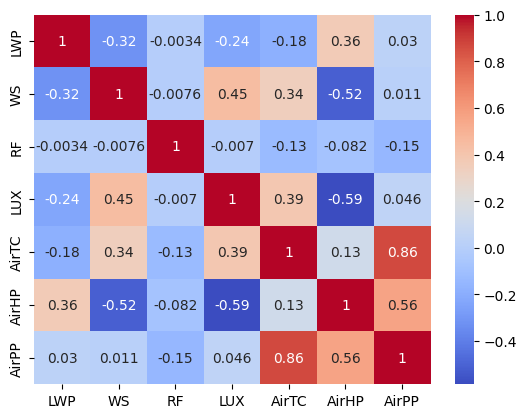

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
features=["AirHP","AirPP"]
X=data[features]
y=data.AirTC
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=41)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

Mean Absolute Error: 1.812451


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=43)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))


Mean Absolute Error: 1.443080


In [ ]:

from xgboost import XGBRegressor

model3= XGBRegressor(n_estimators=1000, learning_rate=0.04)
model3.fit(train_X, train_y)
pred3=model3.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred3)))
print("Mean Absolute Error: %f" %(r2_score(test_y, pred3)))

Mean Absolute Error: 1.401507
Mean Absolute Error: 0.963480


In [ ]:
pred2

array([35.2087, 29.9231, 26.7639, ..., 23.8244, 21.562 , 34.7941])

In [ ]:
data.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

###xgb for temperature predictions on the srm weather data

In [ ]:
import pandas as pd
data = pd.read_csv("/content/final.csv")
# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
dates = pd.to_datetime(data['DATE'])
temperatures = data['AirTC']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.20, random_state=42)



KeyError: ignored

In [ ]:
train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.45)
model.fit(train_X, train_temperatures)

start_date = pd.to_datetime('2023-05-01')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 29, freq='D')

# Predict the temperatures for the next 15 days
#next_dates = pd.date_range(start=test_dates.iloc[-1], periods=90, freq='D')
next_X = pd.DataFrame({'Year': next_dates.year,
                       'Month': next_dates.month,
                       'Day': next_dates.day})
next_predictions = model.predict(next_X)
# = mean_absolute_error(test_temperatures,x_pred)

In [ ]:
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})
print(predictions_df)


         Date  Temperature
0  2023-05-01    28.145388
1  2023-05-02    29.156939
2  2023-05-03    29.217459
3  2023-05-04    26.400364
4  2023-05-05    28.517460
5  2023-05-06    29.606070
6  2023-05-07    28.790981
7  2023-05-08    28.804386
8  2023-05-09    28.639780
9  2023-05-10    29.353334
10 2023-05-11    27.732357
11 2023-05-12    30.233635
12 2023-05-13    29.243910
13 2023-05-14    30.691908
14 2023-05-15    24.705572
15 2023-05-16    25.267742
16 2023-05-17    31.731945
17 2023-05-18    32.279377
18 2023-05-19    31.243361
19 2023-05-20    30.540445
20 2023-05-21    22.867359
21 2023-05-22    28.283236
22 2023-05-23    30.632006
23 2023-05-24    30.165808
24 2023-05-25    30.610394
25 2023-05-26    28.669853
26 2023-05-27    28.433676
27 2023-05-28    33.853786
28 2023-05-29    29.421606


In [ ]:
prediction = predictions_df.Temperature
prediction

0      31.174604
1      30.846560
2      31.364992
3      31.799154
4      31.799154
         ...    
180    27.168503
181    28.555483
182    29.363462
183    30.825115
184    31.174604
Name: Temperature, Length: 185, dtype: float32

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset and split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the gradient boosting regressor
gb_regressor = GradientBoostingRegressor()

# Create a grid search object
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model based on the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Validation MSE: ", mse)


Best Hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 300}
Validation MSE:  10.720630052840168


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
dates = pd.to_datetime(data['Date'])
temperatures = data['AirTC']

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.2, random_state=242)

train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})

# Create and train the XGBoost model with adjusted hyperparameters
model = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8)
model.fit(train_X, train_temperatures)

# Predict the temperatures for the test set
test_predictions = model.predict(test_X)
print(test_predictions)
# Calculate the mean absolute


[27.779354 27.779354 27.881279 28.623955 28.082188 28.788671 28.148289
 27.881279 28.857883 28.857883 28.152637 28.857883 28.623955 27.13576
 27.536674 27.881279 28.082188 27.536674 28.082188 28.384344 28.788671
 28.082188 27.536674 27.779354 28.788671 28.152637 28.347254 28.152637
 28.384344 28.623955 28.857883 28.152637 28.148289 28.857883 27.536674
 28.082188 28.347254 28.351215 27.779354 28.347254 27.881279 28.384344
 27.779354 28.471022 28.351215 28.152637 28.384344 28.152637 28.384344
 28.347254 28.857883 28.082188 28.857883 28.857883 28.347254 28.347254
 28.082188 28.623955 27.779354 28.384344 27.536674 28.471022 28.152637
 27.881279 28.384344 28.788671 27.779354 27.881279 27.881279 28.471022
 28.857883 27.881279 27.881279 27.881279 28.347254 28.857883 28.152637
 28.351215 28.857883 28.082188 28.857883 27.779354 27.536674 28.082188
 28.148289 28.148289 28.471022 27.779354 28.347254 28.082188 28.788671
 28.082188 28.471022 28.857883 27.779354 28.347254 28.788671 28.148289
 28.788

In [ ]:


# Calculate metrics for the test set
mse = mean_squared_error(test_temperatures, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_temperatures, test_predictions)

print("Test Set Metrics:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)
true_values = [32.556721,30.108000,32.350244,33.135962,31.629687,34.271231,34.526951, 33.335732,32.555301, 32.361548,32.480952,31.945833, 31.805357]
# Calculate metrics for the next 15 days (replace true_values with actual temperature values)
next_mse = mean_squared_error(true_values, next_predictions)
next_rmse = np.sqrt(next_mse)
next_r2 = r2_score(true_values, next_predictions)

print("Next 15 Days Metrics:")
print("MSE: ", next_mse)
print("RMSE: ", next_rmse)
print("R2 Score: ", next_r2)

Test Set Metrics:
MSE:  16.29503435221752
RMSE:  4.036710833366383
R2 Score:  0.07310677229558538
Next 15 Days Metrics:
MSE:  0.25567775522208
RMSE:  0.5056458792693559
R2 Score:  0.7874968503788408


In [ ]:

data = pd.read_csv("/content/december-april-30-9803.csv")
data['Date'] = pd.to_datetime(data['Date'])
# Group the data by date and calculate the average value
daily_average = data.groupby(data['Date'].dt.date)['AirTC'].mean()

# Print the daily average values
print(daily_average)

Date
2022-12-13    27.565000
2022-12-14    26.387556
2022-12-15     1.231864
2022-12-16   -51.916038
2022-12-17    26.129000
                ...    
2023-04-26    30.388452
2023-04-27    30.672885
2023-04-28    32.146111
2023-04-29    30.168333
2023-04-30    30.089167
Name: AirTC, Length: 134, dtype: float64


In [ ]:
t = pd.DataFrame(daily_average)
t.to_excel("daily_average",index = False)

ValueError: ignored

#mean of the 23-05-2023 data and comparing with our prediciton

In [ ]:
import pandas as pd
data = pd.read_csv("/content/srm0002-wmu4g-_3_ (1).csv")
data['Date'] = pd.to_datetime(data['Date'])
# Group the data by date and calculate the average value
daily_average = data.groupby(data['Date'].dt.date)['AirTC'].mean()

# Print the daily average values
print(daily_average)

Date
2023-05-23    32.232625
Name: AirTC, dtype: float64


In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
data = pd.read_csv("/content/december-april-30-9803.csv")
dates = pd.to_datetime(data['Date'])
temperatures = data['AirTC']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.26, random_state=40)

train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=103, learning_rate=0.04)
model.fit(train_X, train_temperatures)
start_date = pd.to_datetime('2023-05-01')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].max()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 15, freq='D')


next_X = pd.DataFrame({'Year': next_dates.year,
                       'Month': next_dates.month,
                       'Day': next_dates.day})
next_predictions = model.predict(next_X)
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})


In [ ]:
print(predictions_df)

         Date  Temperature
0  2023-05-01    29.120043
1  2023-05-02    29.897409
2  2023-05-03    29.861835
3  2023-05-04    29.861835
4  2023-05-05    29.861835
5  2023-05-06    29.861835
6  2023-05-07    28.964844
7  2023-05-08    28.497190
8  2023-05-09    28.961481
9  2023-05-10    29.336576
10 2023-05-11    29.362310
11 2023-05-12    29.319902
12 2023-05-13    29.332584
13 2023-05-14    29.328691
14 2023-05-15    26.357605


In [ ]:
start_date = pd.to_datetime('2023-05-22')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
data["hour"] = data["datetime"].dt.hour
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_30_days = pd.date_range(start=start_date + start_time, periods=24 * 30, freq='60T')

# Step 5: Extract hour and day for the next 30 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
#predictions['temperature'] = [data[data['hour'] == hour]['AirTC'].mean()for hour in next_hour]
# Step 7: Fill in temperature predictions based on the average between maximum and mean temperature at the corresponding hour
predictions['temperature'] = [(data[data['hour'] == hour]['AirTC'].max() + data[data['hour'] == hour]['AirTC'].mean()) / 2 for hour in next_hour]
# Step 6: Create DataFrame with predictions for the next 30 days at 6-hour intervals
predictions = pd.DataFrame({'datetime': next_30_days[::6]})  # Only select every 4th datetime

# Step 7: Fill in temperature predictions based on the mean temperature for the corresponding 6-hour interval
predictions['temperature'] = [(data[(data['hour'] >= start_hour) & (data['hour'] < start_hour + 6)]['AirTC'].mean()) for start_hour in next_hour[::6]]  # Only select every 4th hour

print(predictions)



               datetime  temperature
0   2023-05-22 00:00:00    22.066895
1   2023-05-22 06:00:00    27.904741
2   2023-05-22 12:00:00    32.107416
3   2023-05-22 18:00:00    24.874028
4   2023-05-23 00:00:00    22.066895
..                  ...          ...
115 2023-06-19 18:00:00    24.874028
116 2023-06-20 00:00:00    22.066895
117 2023-06-20 06:00:00    27.904741
118 2023-06-20 12:00:00    32.107416
119 2023-06-20 18:00:00    24.874028

[120 rows x 2 columns]


In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
data["data"] = pd.to_datetime(data['Date'])
data["Day"]=data["data"].dt.day
temperatures = data['AirTC']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.26, random_state=40)

train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=103, learning_rate=0.048)
model.fit(train_X, train_temperatures)
start_date = pd.to_datetime('2023-05-01')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 15 days' datetime at 60-minute intervals starting from the specified date/time

# Step 4: Generate next 15 days' datetime at hourly intervals starting from the specified date/time


In [ ]:
# Step 4: Generate next 15 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods=15, freq='D')

# Create the next_X DataFrame with date and time features
next_X = pd.DataFrame({'Year': next_dates.year,
                       'Month': next_dates.month,
                       'Day': next_dates.day,
                       'Hour': next_dates.hour,
                       'Minute': next_dates.minute})

# Predict the temperatures for every hour for the next 15 days
next_predictions = []
for i in range(len(next_X)):
    # Get the previous temperature values for the corresponding hour
    previous_temperatures = data[data['datetime'].dt.day == next_X.loc[i, 'Day']]['AirTC']

    # Use the mean of previous temperatures as the prediction for the current hour
    prediction = previous_temperatures.mean()
    next_predictions.append(prediction)

predictions_df = pd.DataFrame({'Datetime': next_dates, 'Temperature': next_predictions})


In [ ]:
predictions_df[0:30]

,Datetime,Temperature
0,2023-05-01,27.424286
1,2023-05-02,27.207788
2,2023-05-03,26.934421
3,2023-05-04,27.573000
4,2023-05-05,27.251585
5,2023-05-06,27.318571
6,2023-05-07,26.902563
7,2023-05-08,26.798590
8,2023-05-09,26.967818
9,2023-05-10,27.420509


In [ ]:
# Convert the 'Datetime' column to datetime format in predictions_df
predictions_df['Datetime'] = pd.to_datetime(data['Date'])
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
merged_data = pd.merge(predictions_df,data, left_on=True, right_on='Date')

# Calculate the difference between the predicted and actual temperatures
merged_data['Temperature_Difference'] = merged_data['AirTC'] - merged_data['Temperature']

# Print the merged data with the temperature difference
print(merged_data[['Datetime', 'Temperature', 'Temperature_Difference']])

KeyError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a dataset with soil moisture measurements (target variable) and other features
# X should be a 2D array containing the input features, and y should be a 1D array containing the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


TypeError: ignored

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature", "Date": "date"})

# Convert date column to datetime format
data["date"] = pd.to_datetime(data["date"])

# Extract features and target variables
X_train = data[data["date"].dt.month.isin([12, 1, 2, 3, 4])][["date"]].values
y_train = data[data["date"].dt.month.isin([12, 1, 2, 3, 4])]["temperature"].values

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate dates for May 1st to May 30th
forecast_dates = pd.date_range(start="2023-05-01", end="2023-05-30")

# Predict temperatures for the forecast dates
X_test = forecast_dates.to_frame().reset_index(drop=True).values
y_pred = model.predict(X_test)

# Print the forecasted dates and temperatures for May 1st to May 30th
for day, (date, temperature) in enumerate(zip(forecast_dates, y_pred), start=1):
    print(f"Day {day}: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}°C")


TypeError: ignored

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature", "Date": "date"})

# Convert date column to datetime format
data["date"] = pd.to_datetime(data["date"])

# Extract features and target variables
X_train = data[data["date"].dt.month.isin([12, 1, 2, 3, 4])][["date"]]
X_train["date"] = X_train["date"].astype(int)  # Convert datetime to numerical representation
y_train = data[data["date"].dt.month.isin([12, 1, 2, 3, 4])]["temperature"]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate dates for May 1st to May 30th
forecast_dates = pd.date_range(start="2023-05-01", end="2023-05-30")

# Convert forecast dates to numerical representation
X_test = forecast_dates.astype(int).values.reshape(-1, 1)

# Predict temperatures for the forecast dates
y_pred = model.predict(X_test)

# Print the forecasted dates and temperatures for May 1st to May 30th
for day, (date, temperature) in enumerate(zip(forecast_dates, y_pred), start=1):
    print(f"Day {day}: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}°C")


Day 1: 2023-05-01, Temperature: 31.40°C
Day 2: 2023-05-02, Temperature: 31.47°C
Day 3: 2023-05-03, Temperature: 31.54°C
Day 4: 2023-05-04, Temperature: 31.61°C
Day 5: 2023-05-05, Temperature: 31.68°C
Day 6: 2023-05-06, Temperature: 31.75°C
Day 7: 2023-05-07, Temperature: 31.82°C
Day 8: 2023-05-08, Temperature: 31.89°C
Day 9: 2023-05-09, Temperature: 31.96°C
Day 10: 2023-05-10, Temperature: 32.03°C
Day 11: 2023-05-11, Temperature: 32.10°C
Day 12: 2023-05-12, Temperature: 32.17°C
Day 13: 2023-05-13, Temperature: 32.24°C
Day 14: 2023-05-14, Temperature: 32.31°C
Day 15: 2023-05-15, Temperature: 32.38°C
Day 16: 2023-05-16, Temperature: 32.45°C
Day 17: 2023-05-17, Temperature: 32.52°C
Day 18: 2023-05-18, Temperature: 32.59°C
Day 19: 2023-05-19, Temperature: 32.66°C
Day 20: 2023-05-20, Temperature: 32.72°C
Day 21: 2023-05-21, Temperature: 32.79°C
Day 22: 2023-05-22, Temperature: 32.86°C
Day 23: 2023-05-23, Temperature: 32.93°C
Day 24: 2023-05-24, Temperature: 33.00°C
Day 25: 2023-05-25, Tempe

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature", "Date": "date"})
# Convert date column to datetime format
data["date"] = pd.to_datetime(data["date"])
# Extract features (date) and target variable (temperature)
X_train = data[["date"]]
y_train = data["temperature"]
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Generate dates for May 1st to May 30th
forecast_dates = pd.date_range(start="2023-05-01", end="2023-05-30")
# Convert forecast dates to numerical representation
X_test = forecast_dates.astype(int).values.reshape(-1, 1)
# Predict temperatures for the forecast dates
y_pred = model.predict(X_test)
# Print the forecasted dates and temperatures for May 1st to May 30th
for day, (date, temperature) in enumerate(zip(forecast_dates, y_pred), start=1):
    print(f"Day {day}: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}°C")


Day 1: 2023-05-01, Temperature: 31.40°C
Day 2: 2023-05-02, Temperature: 31.47°C
Day 3: 2023-05-03, Temperature: 31.54°C
Day 4: 2023-05-04, Temperature: 31.61°C
Day 5: 2023-05-05, Temperature: 31.68°C
Day 6: 2023-05-06, Temperature: 31.75°C
Day 7: 2023-05-07, Temperature: 31.82°C
Day 8: 2023-05-08, Temperature: 31.89°C
Day 9: 2023-05-09, Temperature: 31.96°C
Day 10: 2023-05-10, Temperature: 32.03°C
Day 11: 2023-05-11, Temperature: 32.10°C
Day 12: 2023-05-12, Temperature: 32.17°C
Day 13: 2023-05-13, Temperature: 32.24°C
Day 14: 2023-05-14, Temperature: 32.31°C
Day 15: 2023-05-15, Temperature: 32.38°C
Day 16: 2023-05-16, Temperature: 32.45°C
Day 17: 2023-05-17, Temperature: 32.52°C
Day 18: 2023-05-18, Temperature: 32.59°C
Day 19: 2023-05-19, Temperature: 32.66°C
Day 20: 2023-05-20, Temperature: 32.72°C
Day 21: 2023-05-21, Temperature: 32.79°C
Day 22: 2023-05-22, Temperature: 32.86°C
Day 23: 2023-05-23, Temperature: 32.93°C
Day 24: 2023-05-24, Temperature: 33.00°C
Day 25: 2023-05-25, Tempe

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature", "Date": "date"})

# Convert date column to datetime format
data["date"] = pd.to_datetime(data["date"])

# Extract features (date) and target variable (temperature)
X_train = data[["date"]]
y_train = data["temperature"]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate dates for May 1st to May 30th
forecast_dates = pd.date_range(start="2023-05-01", end="2023-05-30")

# Convert forecast dates to numerical representation
X_test = forecast_dates.astype(int).values.reshape(-1, 1)

# Predict temperatures for the forecast dates
y_pred = model.predict(X_test)

# Create a DataFrame to store the forecasted data
forecast_data = pd.DataFrame({"Date": forecast_dates, "Temperature": y_pred})
print(forecast_data)
# Save the forecasted data to an Excel file
#forecast_data.to_excel("temperature_forecast.xlsx", index=False)


         Date  Temperature
0  2023-05-01    31.401120
1  2023-05-02    31.470782
2  2023-05-03    31.540443
3  2023-05-04    31.610104
4  2023-05-05    31.679765
5  2023-05-06    31.749426
6  2023-05-07    31.819087
7  2023-05-08    31.888748
8  2023-05-09    31.958409
9  2023-05-10    32.028070
10 2023-05-11    32.097732
11 2023-05-12    32.167393
12 2023-05-13    32.237054
13 2023-05-14    32.306715
14 2023-05-15    32.376376
15 2023-05-16    32.446037
16 2023-05-17    32.515698
17 2023-05-18    32.585359
18 2023-05-19    32.655020
19 2023-05-20    32.724682
20 2023-05-21    32.794343
21 2023-05-22    32.864004
22 2023-05-23    32.933665
23 2023-05-24    33.003326
24 2023-05-25    33.072987
25 2023-05-26    33.142648
26 2023-05-27    33.212309
27 2023-05-28    33.281971
28 2023-05-29    33.351632
29 2023-05-30    33.421293


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files

# Specify the file path of the Excel file
file_path = "temperature_forecast.xlsx"

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
forecast_data.to_excel("temperature_forecast.xlsx", index=False)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_train, y_pred)

print("Mean Squared Error:", mse)


ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared value for the training dataset
r2_train = r2_score(y_train.random, y_pred)

print("R-squared for Training Dataset:", r2_train)




R-squared for Training Dataset: -0.6363530839825284


In [ ]:
import pandas as pd
data = pd.read_csv("/content/srm0002-wmu4g-_12_ (1).csv")
data['Date'] = pd.to_datetime(data['Date'])
# Group the data by date and calculate the average value
daily_average = data.groupby(data['Date'].dt.date)['AirTC'].mean()

# Print the daily average values
print(daily_average)
daily_average.to_excel("daily_average.xlsx",index = False)
from google.colab import files

# Specify the file path of the Excel file
file_path = "daily_average.xlsx"

# Download the file
files.download(file_path)


Date
2023-05-01    29.420235
2023-05-02    27.299643
2023-05-03    28.809167
2023-05-04    29.077500
2023-05-05    29.361190
2023-05-06    26.971928
2023-05-07    29.307195
2023-05-08    30.387262
2023-05-09    31.698353
2023-05-10    32.556721
2023-05-11    30.108000
2023-05-12    32.350244
2023-05-13    33.135962
2023-05-14    31.629687
2023-05-15    34.271231
2023-05-16    34.526951
2023-05-17    33.335732
2023-05-18    32.555301
2023-05-19    32.361548
2023-05-20    32.480952
2023-05-21    31.945833
2023-05-22    31.805357
2023-05-23    32.232625
2023-05-24    34.626444
2023-05-25    33.324167
2023-05-26    28.106087
Name: AirTC, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

daily_average_df = pd.read_excel("/content/daily_average.xlsx")
# Read the temperature forecast output file
temperature_forecast_df = pd.read_excel("/content/temperature_forecast.xlsx")
# Get the number of rows in each DataFrame
num_rows_daily = daily_average_df.shape[0]
num_rows_forecast = temperature_forecast_df.shape[0]

# Determine the minimum number of rows to align the tables
min_rows = min(num_rows_daily, num_rows_forecast)

# Trim the extra rows from each DataFrame
daily_average_df = daily_average_df[:min_rows]
temperature_forecast_df = temperature_forecast_df[:min_rows]

# Concatenate the two DataFrames vertically
merged_df = pd.concat([daily_average_df, temperature_forecast_df], ignore_index=True)

# Print the merged DataFrame
print(merged_df)

# Save the merged DataFrame to a new file
merged_df.to_csv("merged_output.csv", index=False)


        AirTC       Date  Temperature
0   29.420235        NaT          NaN
1   27.299643        NaT          NaN
2   28.809167        NaT          NaN
3   29.077500        NaT          NaN
4   29.361190        NaT          NaN
5   26.971928        NaT          NaN
6   29.307195        NaT          NaN
7   30.387262        NaT          NaN
8   31.698353        NaT          NaN
9   32.556721        NaT          NaN
10  30.108000        NaT          NaN
11  32.350244        NaT          NaN
12  33.135962        NaT          NaN
13  31.629687        NaT          NaN
14  34.271231        NaT          NaN
15  34.526951        NaT          NaN
16  33.335732        NaT          NaN
17  32.555301        NaT          NaN
18  32.361548        NaT          NaN
19  32.480952        NaT          NaN
20  31.945833        NaT          NaN
21  31.805357        NaT          NaN
22  32.232625        NaT          NaN
23  34.626444        NaT          NaN
24  33.324167        NaT          NaN
25  28.10608

In [ ]:

from google.colab import files

# Specify the file path of the Excel file
file_path = "merged_output.csv"

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})
# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Normalize the temperature values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
temperature = scaler.fit_transform(temperature.reshape(-1, 1))

# Split the dataset into training and testing sets
train_days = len(temperature) - 30
train_data = temperature[:train_days]
test_data = temperature[train_days:]

# Define the sequence length
sequence_length = 60

# Create training sequences
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the neural network model
model = Sequential()
model.add(LSTM(128, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=64)

# Generate predictions for the next 30 days
last_sequence = X_test[-1].reshape((1, sequence_length, 1))
forecast = []

for _ in range(30):
    prediction = model.predict(last_sequence)
    forecast.append(prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = prediction[0, 0]

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
forecast = np.ceil(forecast)  # Round the forecasted temperatures up

# Get the last date from the dataset
last_date = dates.iloc[-1]

# Generate forecasted dates for the next 30 days
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30, freq="D")

# Print the forecasted dates and temperatures for the next 30 days
for day, (date, temperature) in enumerate(zip(forecast_dates, forecast), start=1):
    print(f"Day {day}: {date.strftime('%Y-%m-%d')}, Temperature: {temperature[0]:.0f}°C")


Epoch 1/200
152/152 [==============================] - 34s 204ms/step - loss: 0.0213
Epoch 2/200
152/152 [==============================] - 20s 130ms/step - loss: 6.8615e-04
Epoch 3/200
152/152 [==============================] - 17s 114ms/step - loss: 5.8894e-04
Epoch 4/200
152/152 [==============================] - 16s 106ms/step - loss: 5.6220e-04
Epoch 5/200
152/152 [==============================] - 17s 112ms/step - loss: 5.2636e-04
Epoch 6/200
152/152 [==============================] - 17s 113ms/step - loss: 5.1458e-04
Epoch 7/200
152/152 [==============================] - 18s 119ms/step - loss: 4.9776e-04
Epoch 8/200
152/152 [==============================] - 16s 105ms/step - loss: 4.7423e-04
Epoch 9/200
152/152 [==============================] - 17s 113ms/step - loss: 4.2787e-04
Epoch 10/200
152/152 [==============================] - 17s 111ms/step - loss: 6.2172e-04
Epoch 11/200
152/152 [==============================] - 16s 104ms/step - loss: 5.8309e-04
Epoch 12/200
152/152 [=

IndexError: ignored